Objective: Train a sentiment classifier on a corpus of the provided documents. Your goal is to maximize accuracy. There is special interest in being able to accurately detect negative sentiment. The training data includes documents from a wide variety of sources, not merely social media, and some of it may be inconsistently labeled. Please describe the business outcomes in your work sample including how data limitations impact your results and how these limitations could be addressed in a larger project.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from data_prep import (X_train_scale, y_train,
                       X_test_scale, y_test,
                       train_vectors, test_vectors)
from stopwords import STOPWORDS

/Users/stevedye/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/stevedye/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/Users/stevedye/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


In [2]:
train_vectors

<15171x27273 sparse matrix of type '<class 'numpy.int64'>'
	with 177997 stored elements in Compressed Sparse Row format>

In [3]:
X_train_scale

array([[-0.31905568, -0.29878431, -0.52504337, ..., -0.00811909,
        -0.00811909, -0.00811909],
       [ 0.12000885,  0.16326176, -0.52504337, ..., -0.00811909,
        -0.00811909, -0.00811909],
       [-0.90447506, -1.03805802, -0.81135346, ..., -0.00811909,
        -0.00811909, -0.00811909],
       ...,
       [ 2.82757348,  2.47349211,  2.62436761, ..., -0.00811909,
        -0.00811909, -0.00811909],
       [ 1.14449277,  1.17976312,  0.04757681, ..., -0.00811909,
        -0.00811909, -0.00811909],
       [-0.46541053, -0.48360274, -0.23873328, ..., -0.00811909,
        -0.00811909, -0.00811909]])

In [4]:
clf = RandomForestClassifier(max_depth=2, random_state=0)

In [10]:
clf.fit(X_train_scale, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

Confusion Matrix
[[   3 1319    0]
 [   0 2232    0]
 [   0 1502    1]]


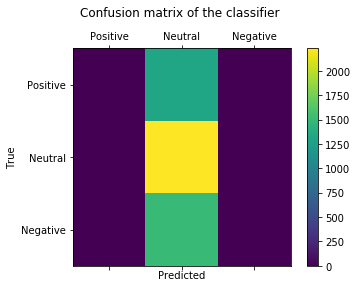

Accuracy is 0.442159383033419 


In [11]:
y_pred = clf.predict(X_test_scale)
cm = confusion_matrix(y_test , y_pred)
print("Confusion Matrix")
print(cm)
labels=['Positive','Neutral','Negative']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier \n')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print('Accuracy is {} '.format(accuracy_score(y_test, y_pred)))

In [14]:
scores = cross_val_score(clf, X_train_scale, y_train, cv=5, scoring="accuracy")

In [15]:
scores

array([0.44448105, 0.44133158, 0.44199077, 0.44330916, 0.44199077])

Data limitations:

-- Lack of full stopwords list

Submit your work sample as a single pdf or html file that is comprehensive with respect to your thought process, code, findings, and recommendations (ie a notebook). You may submit other documents if you wish, but compressed files will not be accepted.